In [20]:
# Imports
from utils import qr_householder, linear_regression

import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Read the CSV file
medical_data = pd.read_csv('vidu4_lin_reg.csv')

# A few representative data points
print(medical_data.head())

   ID  TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYNTM
0   1    56   21  160     14.0         6.00      1.95
1   2    76   18  150     12.0         4.97      1.33
2   3    63   16  160      4.4         6.39      0.83
3   4    78   20  100      4.0         7.00      2.00
4   5    87   20  110      4.6         4.10      1.30


In [21]:
# Subset the first 80 data points for training
training_data = medical_data.iloc[:80].copy()

X_train = training_data[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']].values
y_train = training_data['BEDAYNTM'].values

# Subset the remaining 20 data points for testing
test_data = medical_data.iloc[80:].copy()

X_test = test_data[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']].values
y_test = test_data['BEDAYNTM'].values

In [22]:
# X = medical_data[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']].values
# y = medical_data['BEDAYNTM'].values

# # Split the data into training and testing sets using train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

R-squared: 0.214538939386403
MSE 0.22740099167615915
MAE: 0.3053259833743659


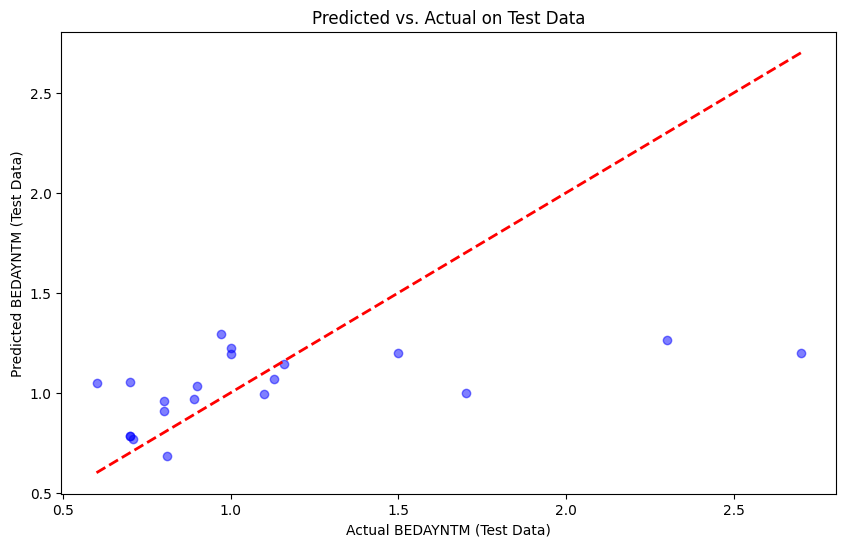

In [23]:
# Method 1: QR decomposition

# Train the model using QR decomposition
w = linear_regression(X_train, y_train)

# Predict on the test set
X_test_bars = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)  # Add bias term
y_pred = np.dot(X_test_bars, w)

# Evaluate the model on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
print("MSE", mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Plot the test results (Predicted vs. Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual BEDAYNTM (Test Data)')
plt.ylabel('Predicted BEDAYNTM (Test Data)')
plt.title('Predicted vs. Actual on Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.show()

R-squared: 0.21453893938640334
MSE 0.22740099167615907
MAE: 0.30532598337436595


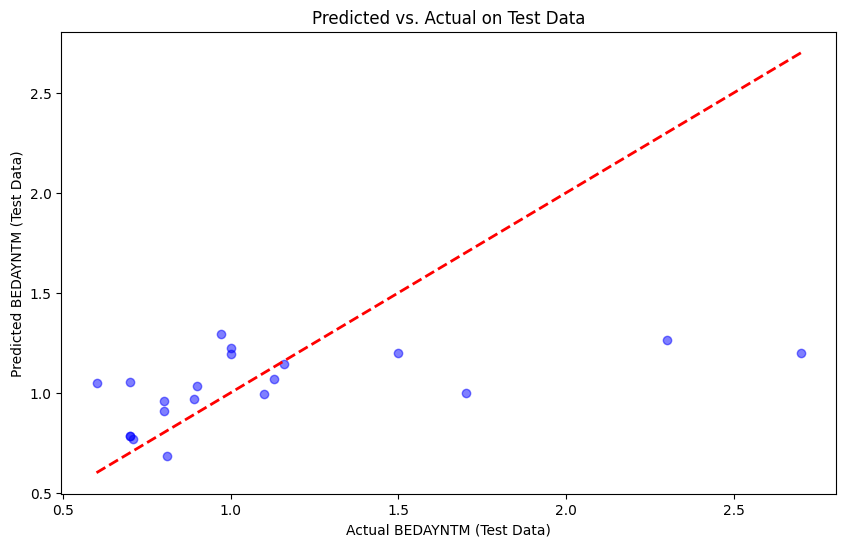

In [24]:
# Method 2: sklearn linear regression

# Train the model
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

# Predict on the test set
y_pred = regr.predict(X_test)

# Evaluate the model on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
print("MSE", mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Plot the test results (Predicted vs. Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.xlabel('Actual BEDAYNTM (Test Data)')
plt.ylabel('Predicted BEDAYNTM (Test Data)')
plt.title('Predicted vs. Actual on Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.show()